In [1]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
# from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Customer_Data (1).csv")

In [3]:
df1=df.copy()
df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df1.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [239]:
df1.dropna(subset=['CREDIT_LIMIT'],inplace=True)

In [240]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8636.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2372.566350,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,169.163545,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,825.496463,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [241]:
df1[['PAYMENTS', 'MINIMUM_PAYMENTS']][df1['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


In [242]:
df1[['PAYMENTS', 'MINIMUM_PAYMENTS']][df1['MINIMUM_PAYMENTS'] > df1['PAYMENTS']]

,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8933,106.138603,337.294767
8939,72.530037,110.950798
8947,81.270775,82.418369
8948,52.549959,55.755628


In [243]:
df1.dropna(subset=['MINIMUM_PAYMENTS'],inplace=True)

In [245]:
df1.describe(include=object)

,CUST_ID
count,8636
unique,8636
top,C10001
freq,1


In [246]:
df1.groupby(['CUST_ID'])[['BALANCE']].max().sort_values(by='BALANCE',ascending=False).head(10)

,BALANCE
CUST_ID,
C10144,19043.13856
C14256,18495.55855
C15642,16304.88925
C16812,16259.44857
C15429,16115.59640
C12434,15532.33972
C10544,15258.22590
C10609,15244.74865
C14836,15155.53286


In [247]:
df1.groupby('CUST_ID')['BALANCE_FREQUENCY'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

,CUST_ID,count
0,C10001,1
5752,C16111,1
5766,C16125,1
5765,C16124,1
5764,C16123,1
5763,C16122,1
5762,C16121,1
5761,C16120,1
5760,C16119,1
5759,C16118,1


In [248]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [249]:
df1.groupby('CUST_ID')['ONEOFF_PURCHASES'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

,CUST_ID,count
0,C10001,1
5752,C16111,1
5766,C16125,1
5765,C16124,1
5764,C16123,1
5763,C16122,1
5762,C16121,1
5761,C16120,1
5760,C16119,1
5759,C16118,1


In [250]:
count_1=df1[df1['ONEOFF_PURCHASES']==1]
count_1.shape

(4, 18)

In [251]:
count_0=df1[df1['ONEOFF_PURCHASES']==0]
count_0.shape

(4113, 18)

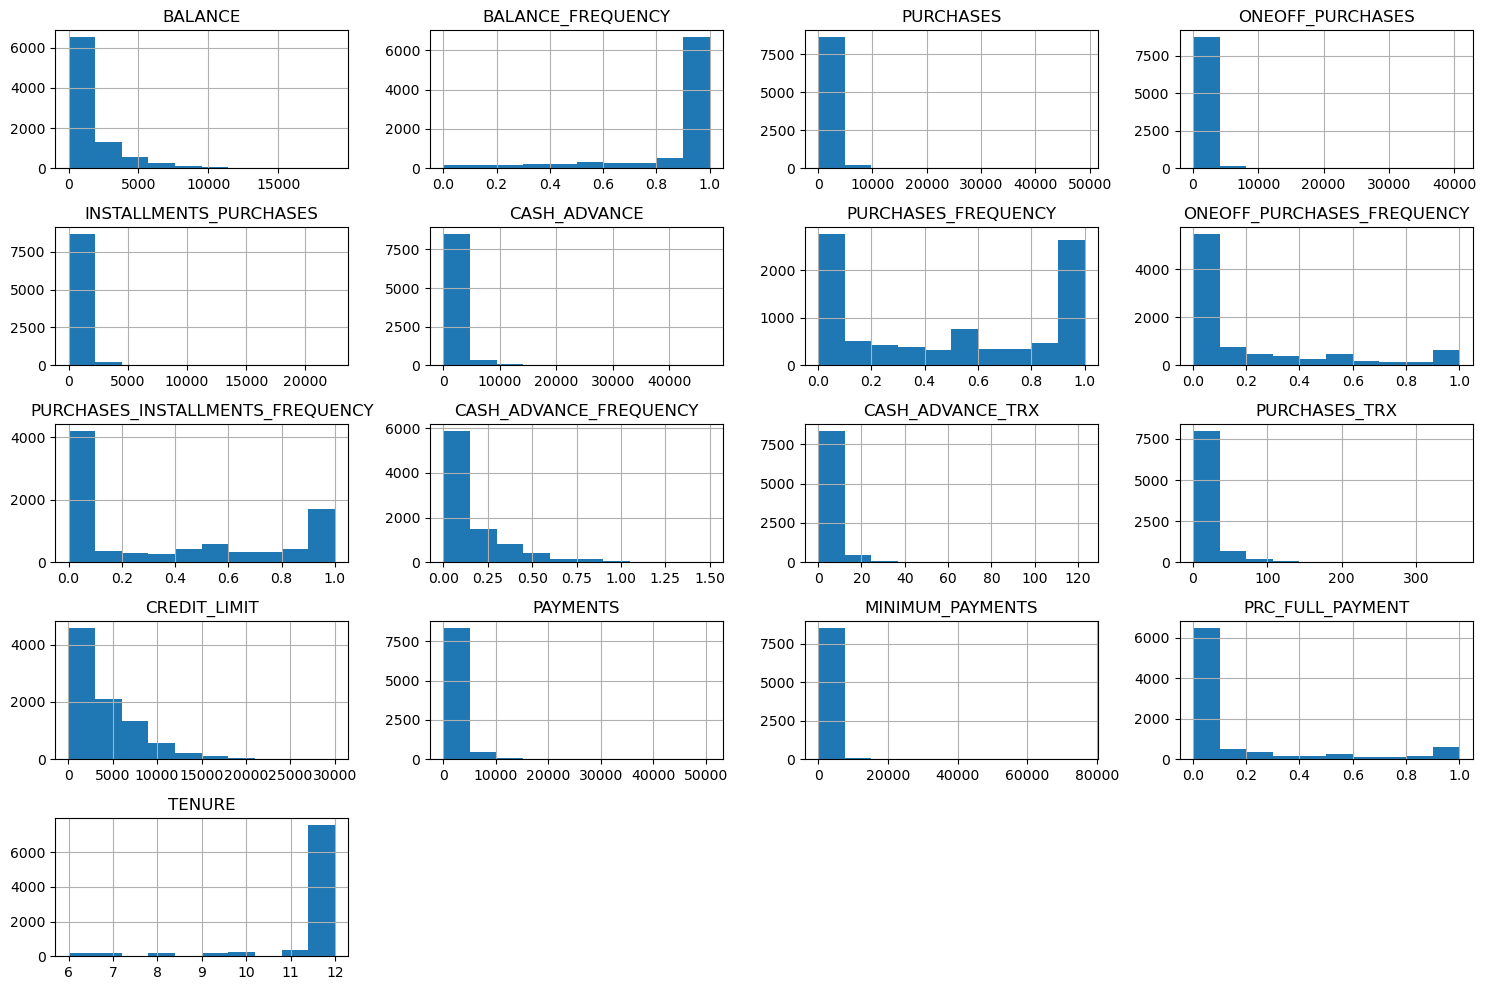

In [252]:
df.hist(figsize=(15,10))
plt.tight_layout()

Observation:
- 1- As the credit limit increase, the balance also increases hence a linear relationship
- 2- As the number of purchases increases, the number of "cash in advance" transactions decreases
- 3- As the credit balance is low, the purchases, oneoffpurchases and installments purchases are less. Thus validating our assumption from univariate analysis
- 4- Purchases, oneoffpurchases and installment purchases are all related linearly
- 5- As the credit balance is low, the "cash in advance" transactions are less

In [253]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [254]:
df1.drop(columns=['CUST_ID'],inplace=True)

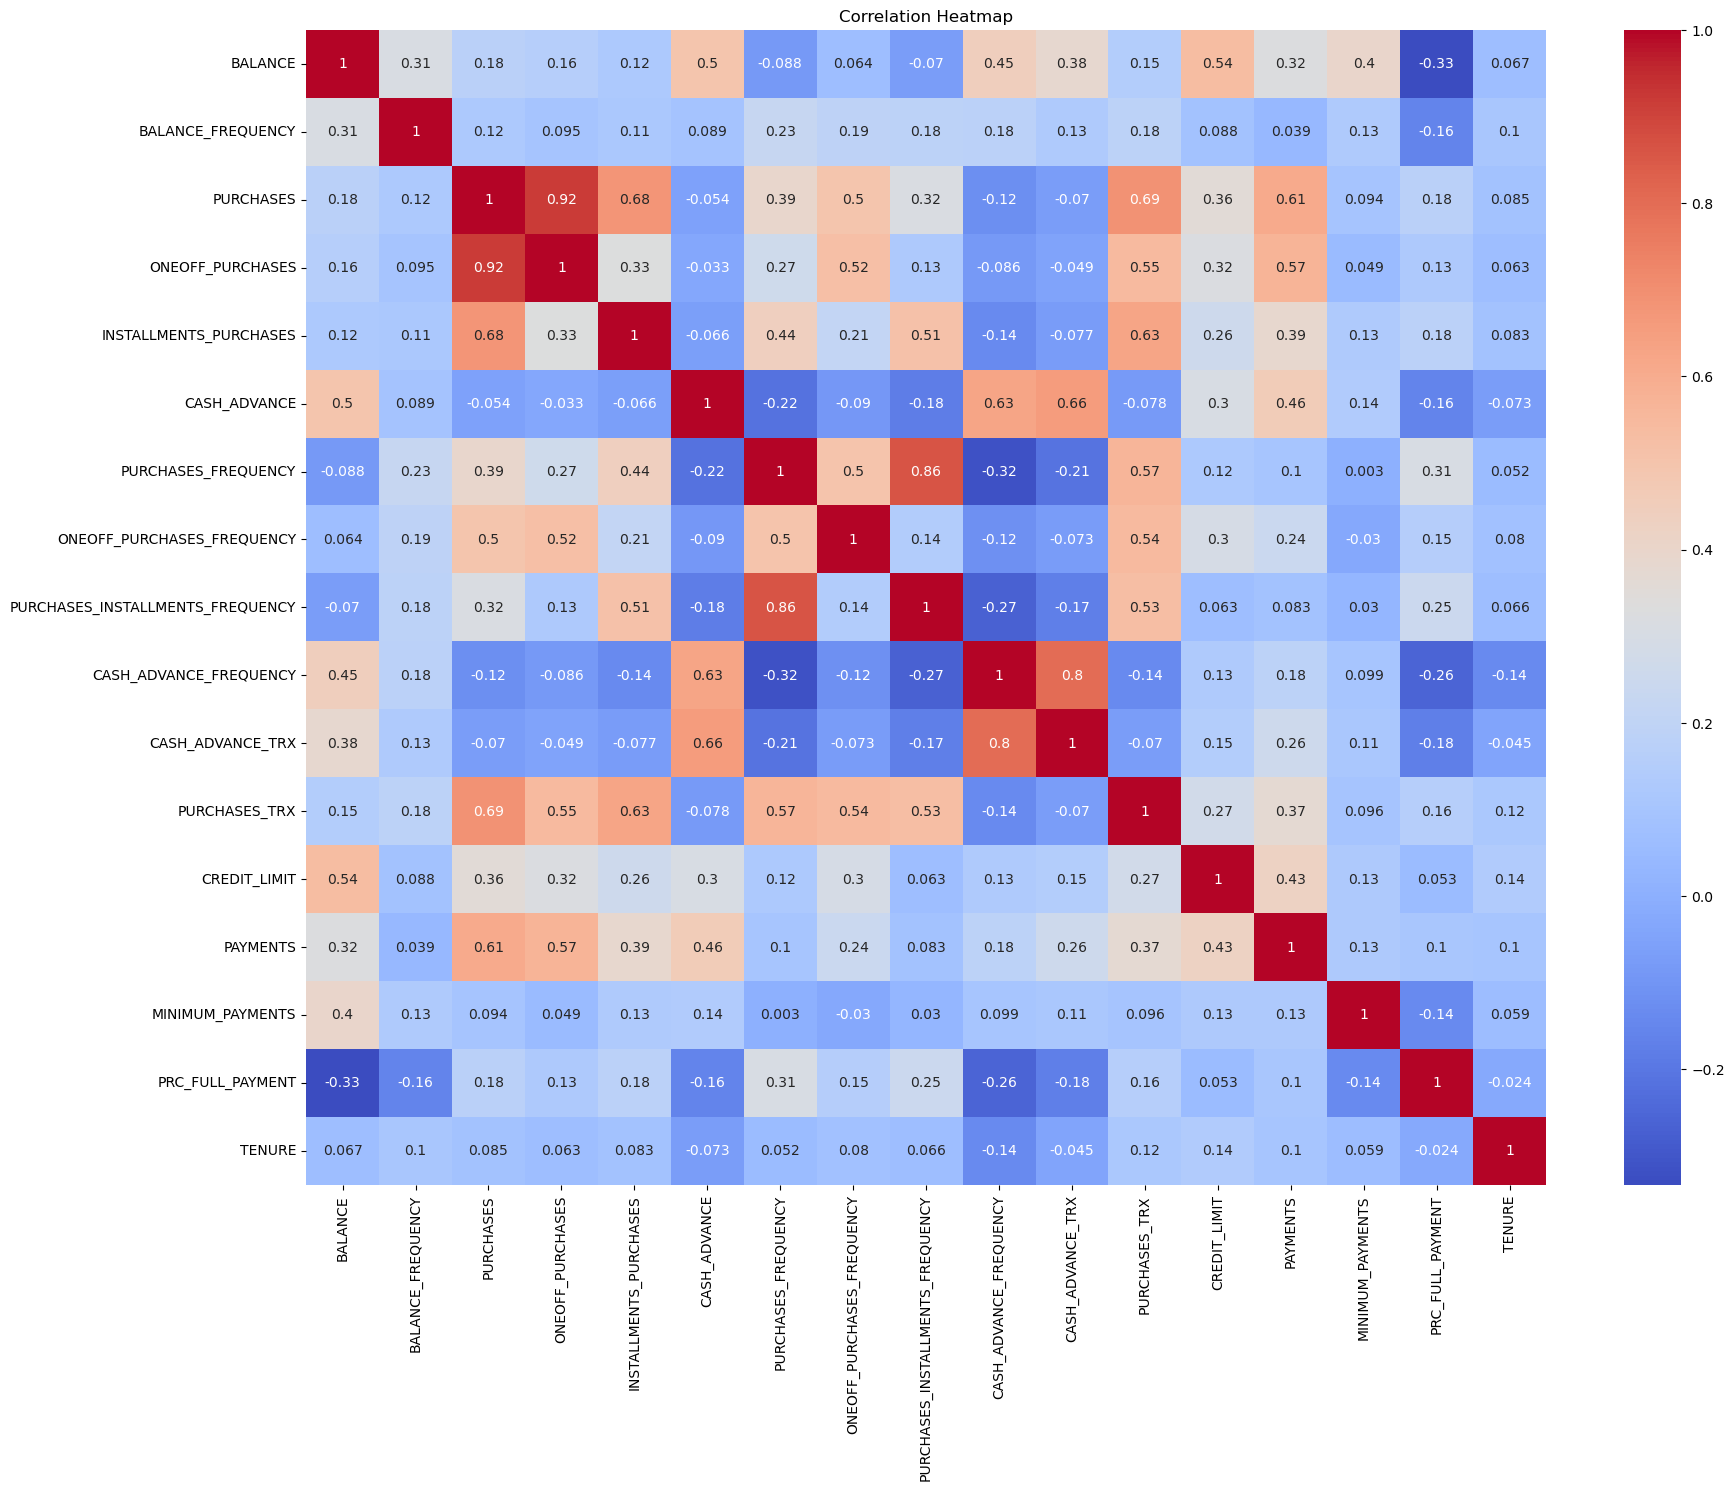

In [255]:
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [256]:
df1.corr()['BALANCE'].sort_values(ascending=False)    

BALANCE                             1.000000
CREDIT_LIMIT                        0.535518
CASH_ADVANCE                        0.495586
CASH_ADVANCE_FREQUENCY              0.445307
MINIMUM_PAYMENTS                    0.398669
CASH_ADVANCE_TRX                    0.382388
PAYMENTS                            0.322830
BALANCE_FREQUENCY                   0.310140
PURCHASES                           0.176083
ONEOFF_PURCHASES                    0.159985
PURCHASES_TRX                       0.147887
INSTALLMENTS_PURCHASES              0.122109
TENURE                              0.066987
ONEOFF_PURCHASES_FREQUENCY          0.063832
PURCHASES_INSTALLMENTS_FREQUENCY   -0.069582
PURCHASES_FREQUENCY                -0.088459
PRC_FULL_PAYMENT                   -0.333594
Name: BALANCE, dtype: float64

In [257]:
df1.corr()['CREDIT_LIMIT'].sort_values(ascending=False) 

CREDIT_LIMIT                        1.000000
BALANCE                             0.535518
PAYMENTS                            0.426951
PURCHASES                           0.358425
ONEOFF_PURCHASES                    0.320613
CASH_ADVANCE                        0.304161
ONEOFF_PURCHASES_FREQUENCY          0.295432
PURCHASES_TRX                       0.273715
INSTALLMENTS_PURCHASES              0.258057
CASH_ADVANCE_TRX                    0.150261
TENURE                              0.136464
CASH_ADVANCE_FREQUENCY              0.132841
MINIMUM_PAYMENTS                    0.126671
PURCHASES_FREQUENCY                 0.121372
BALANCE_FREQUENCY                   0.087682
PURCHASES_INSTALLMENTS_FREQUENCY    0.063421
PRC_FULL_PAYMENT                    0.052578
Name: CREDIT_LIMIT, dtype: float64

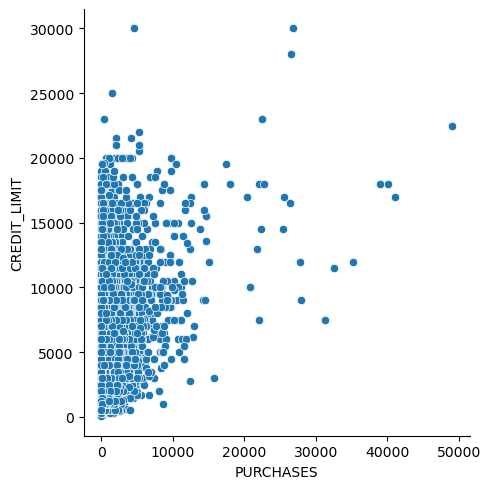

In [258]:
sns.relplot(x='PURCHASES',y='CREDIT_LIMIT',data=df1)

- high purchases in the range 0-10000
- Credit limit more in the range 0-20000

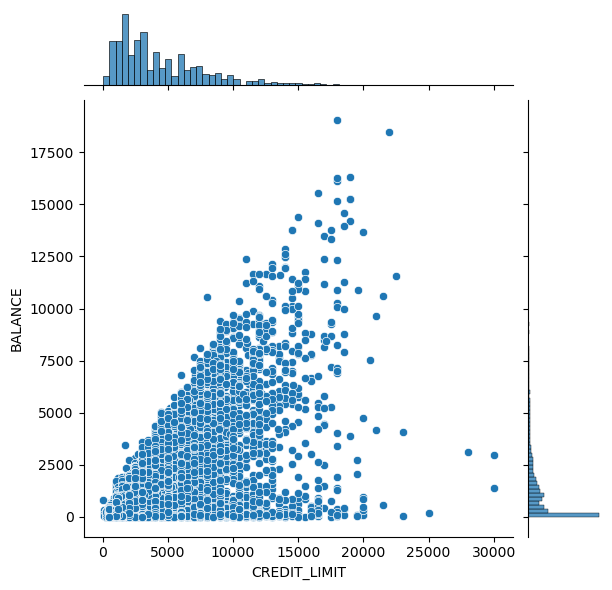

In [259]:
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df1)

- CREDIT_LIMIT & BALANCE are in a linear relation with each other ie. if a customer's balance increases, his/her credit limit shall increase
- Most customers lie in and under 15000 credit limit and 10K balance
others can be considered as premium customers

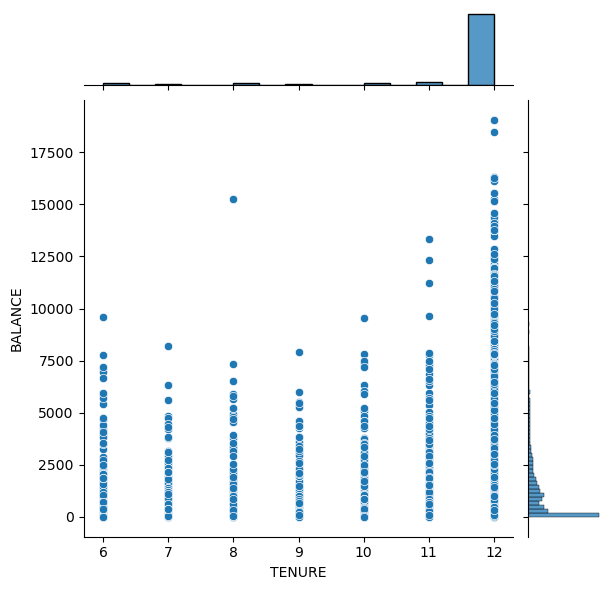

In [260]:
sns.jointplot(x='TENURE', y='BALANCE', data=df1)

- customers with high tenur ,also have high balance

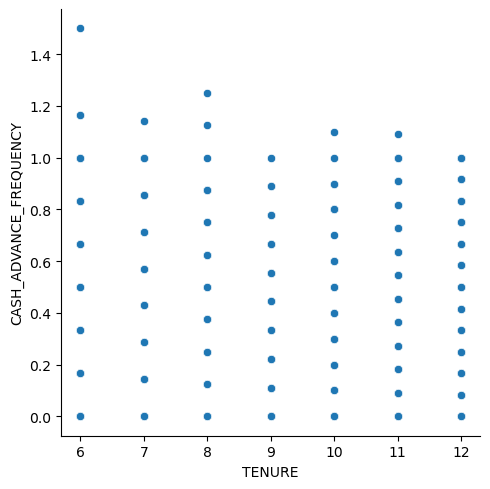

In [261]:
sns.relplot(x='TENURE',y='CASH_ADVANCE_FREQUENCY',data=df1)

- Old customers(with tenure=12) have cash adv freq less than one
- New customers(tenure 6-11) take cash advance more frequently


In [262]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [263]:
scaler= StandardScaler()
df1['BALANCE'] = scaler.fit_transform(df1[['BALANCE']])
df1['PURCHASES'] = scaler.fit_transform(df1[['PURCHASES']])
df1['ONEOFF_PURCHASES'] = scaler.fit_transform(df1[['ONEOFF_PURCHASES']])
df1['INSTALLMENTS_PURCHASES'] = scaler.fit_transform(df1[['INSTALLMENTS_PURCHASES']])
df1['CASH_ADVANCE'] = scaler.fit_transform(df1[['CASH_ADVANCE']])
df1['ONEOFF_PURCHASES'] = scaler.fit_transform(df1[['ONEOFF_PURCHASES']])
df1['CASH_ADVANCE_TRX'] = scaler.fit_transform(df1[['CASH_ADVANCE_TRX']])
df1['PURCHASES_TRX'] = scaler.fit_transform(df1[['PURCHASES_TRX']])
df1['CREDIT_LIMIT'] = scaler.fit_transform(df1[['CREDIT_LIMIT']])
df1['PAYMENTS'] = scaler.fit_transform(df1[['PAYMENTS']])
df1['MINIMUM_PAYMENTS'] = scaler.fit_transform(df1[['MINIMUM_PAYMENTS']])
df1['PRC_FULL_PAYMENT'] = scaler.fit_transform(df1[['PRC_FULL_PAYMENT']])



In [264]:
kmeans=KMeans(n_clusters=3)


In [266]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [318]:
kmeans.labels_


array([0, 2, 0, ..., 0, 0, 0])

In [268]:
y_kmeans = kmeans.fit_predict(df1)
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [269]:
customer_clustered = df1.copy()

In [270]:
customer_clustered['cluster3']=y_kmeans

In [271]:
customer_clustered['cluster3'].value_counts()

cluster3
0    7346
2     706
1     584
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

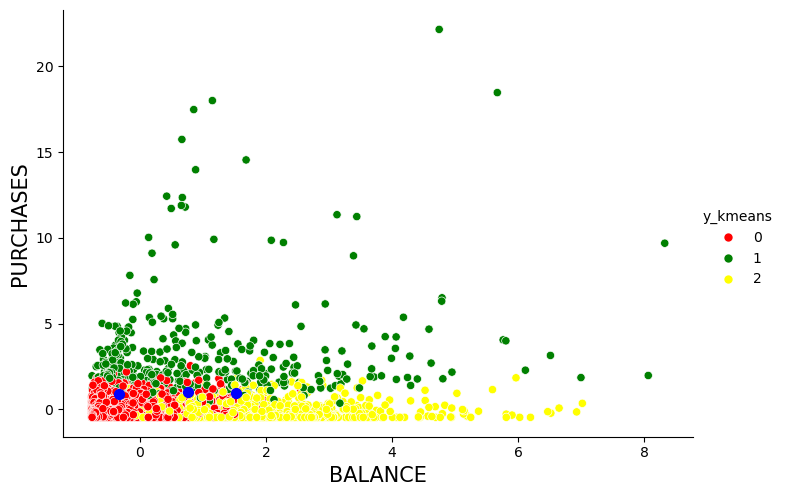

In [323]:

# Assuming 'kmeans.labels_' is the array with cluster labels
customer_clustered['y_kmeans'] = kmeans.labels_  # Add cluster labels to the dataframe

# Plotting
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,6))

# Use 'y_kmeans' in hue after adding it to the dataframe
sns.relplot(data=customer_clustered, x='BALANCE', y='PURCHASES', hue='y_kmeans', palette=['red', 'green', 'yellow'], kind='scatter', aspect=11.7/8.27)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.xlabel("BALANCE", fontsize=15)
plt.ylabel("PURCHASES", fontsize=15)
plt.show()


Text(36.101439815474315, 0.5, 'CASH_ADVANCE')

<Figure size 1000x600 with 0 Axes>

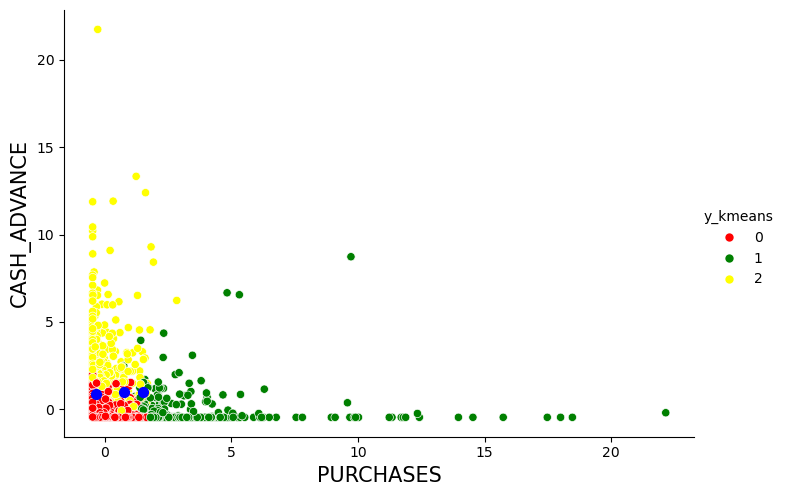

In [325]:

# Assuming 'kmeans.labels_' is the array with cluster labels
customer_clustered['y_kmeans'] = kmeans.labels_  # Add cluster labels to the dataframe

# Plotting
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,6))
sns.relplot(data = customer_clustered ,x='PURCHASES', y='CASH_ADVANCE', hue="y_kmeans", palette=['red','green','yellow'] ,kind='scatter', aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='blue', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

In [272]:
describe_clusters = customer_clustered.groupby(customer_clustered['cluster3']).mean()
describe_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster3,,,,,,,,,,,,,,,,,
0,-0.062320,0.894482,-0.166952,-0.142171,-0.133458,-0.051221,0.467518,0.178042,0.342841,0.130051,-0.024481,-0.158414,-0.068871,-0.119787,-0.037843,-0.034119,11.892458
1,1.057834,0.981690,2.414543,2.026665,1.983985,0.400592,0.918121,0.646506,0.775420,0.131133,0.150290,2.417797,1.409162,1.900614,0.703371,0.338972,11.948630
2,-0.226585,0.829111,-0.260149,-0.197143,-0.252504,0.201595,0.443183,0.131405,0.302801,0.221545,0.130406,-0.351672,-0.449040,-0.325786,-0.188070,0.074614,7.466006


In [273]:
# Create a list of all the features
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

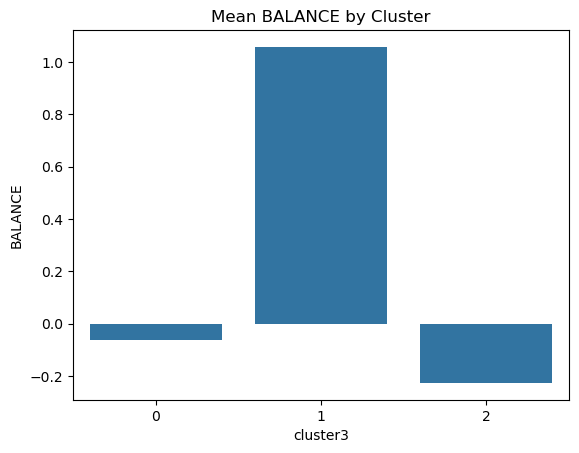

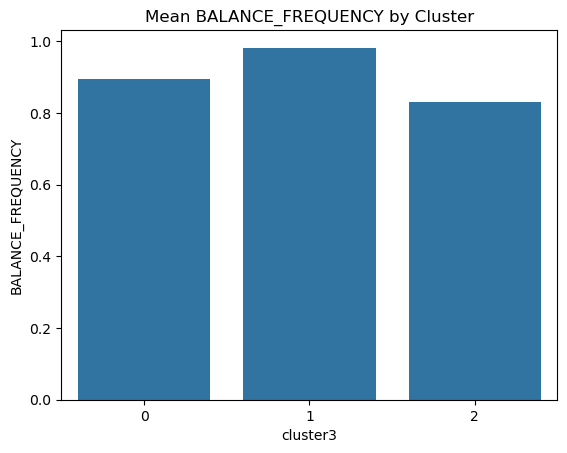

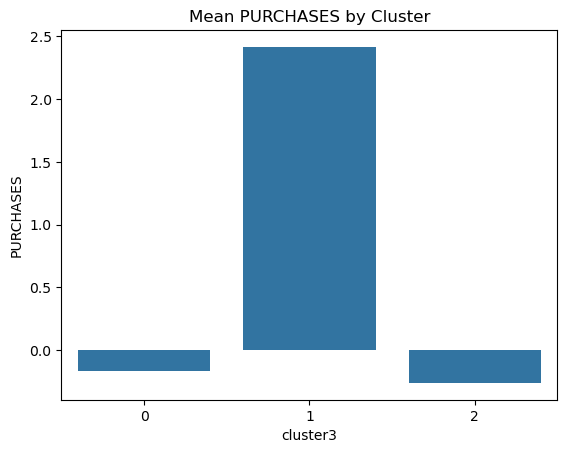

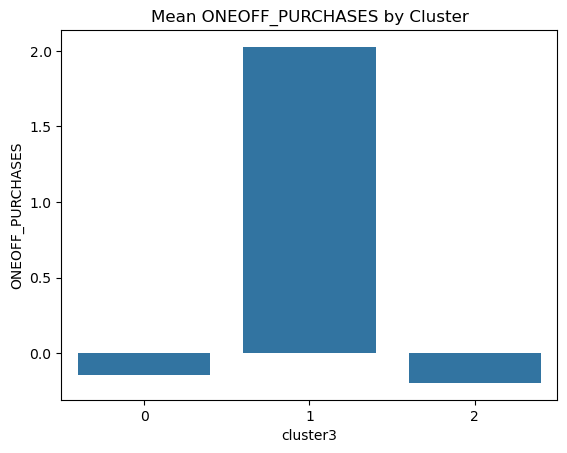

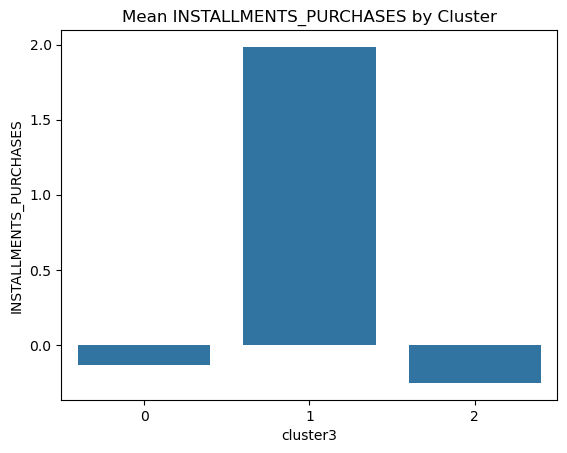

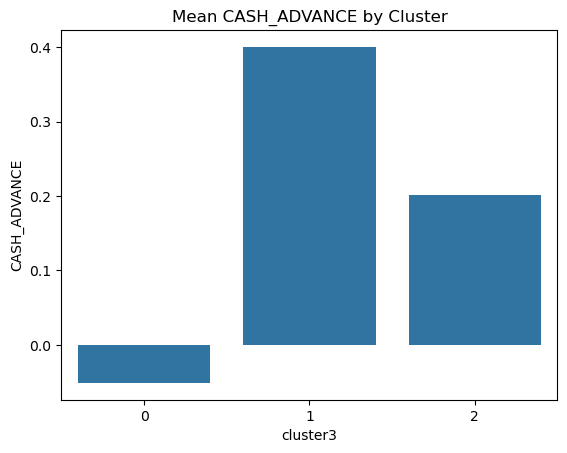

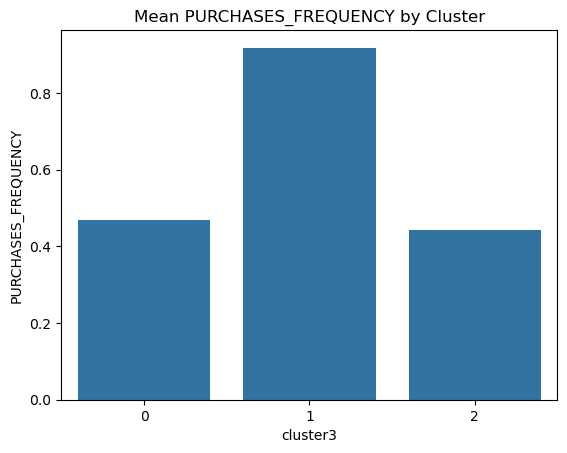

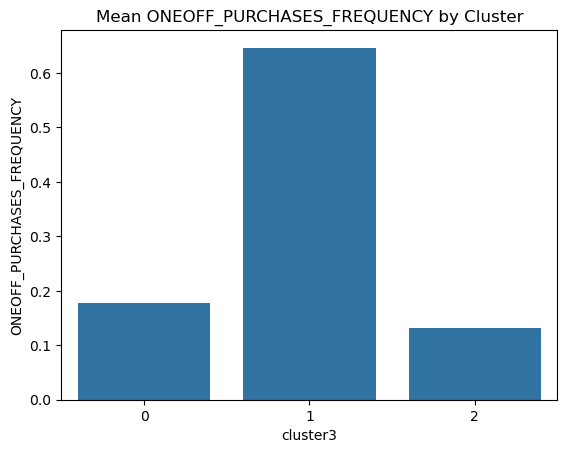

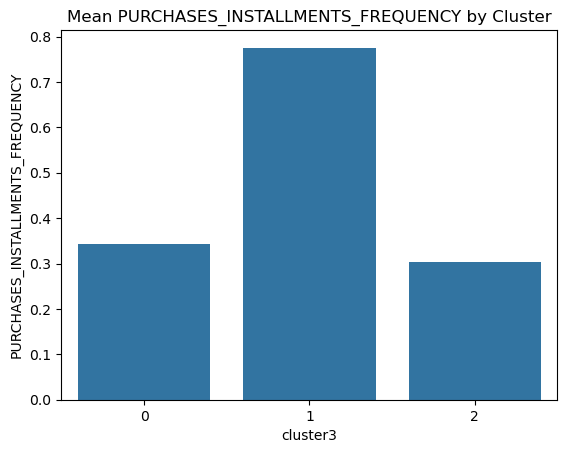

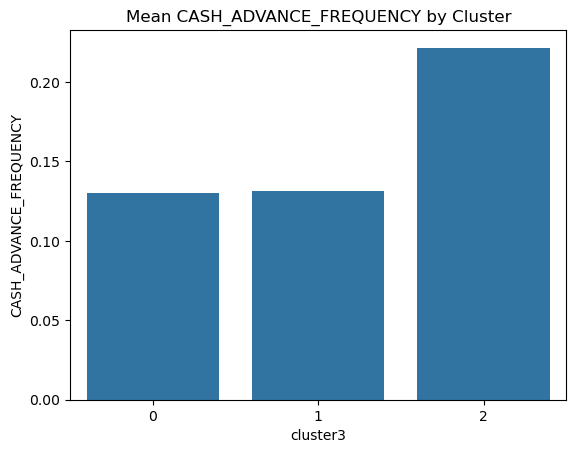

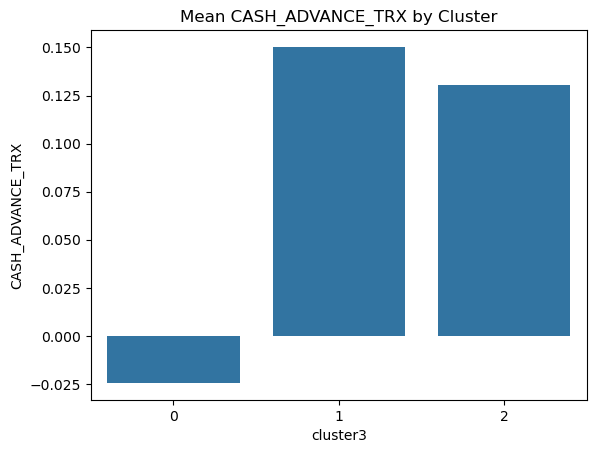

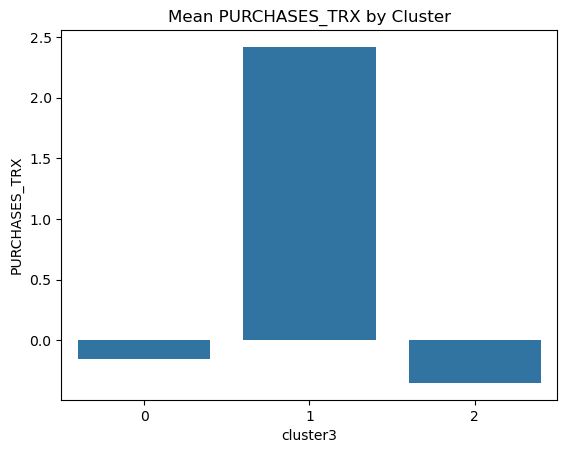

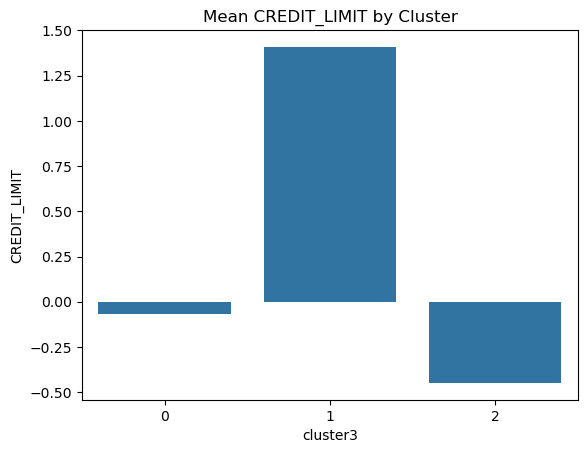

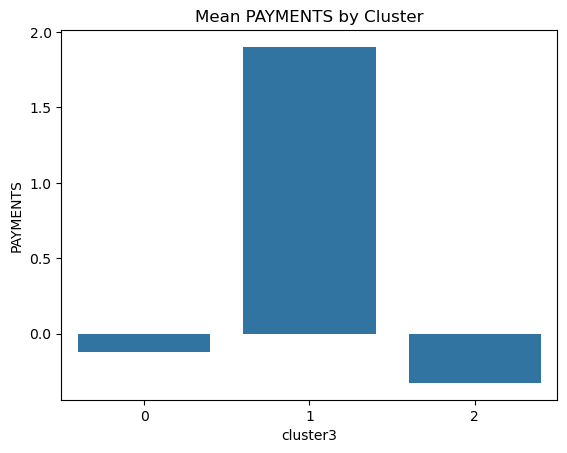

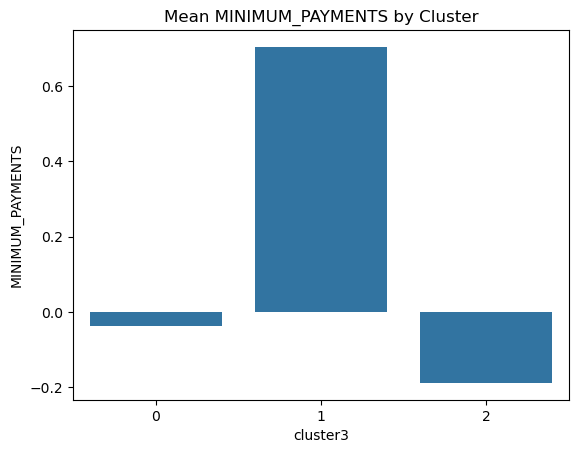

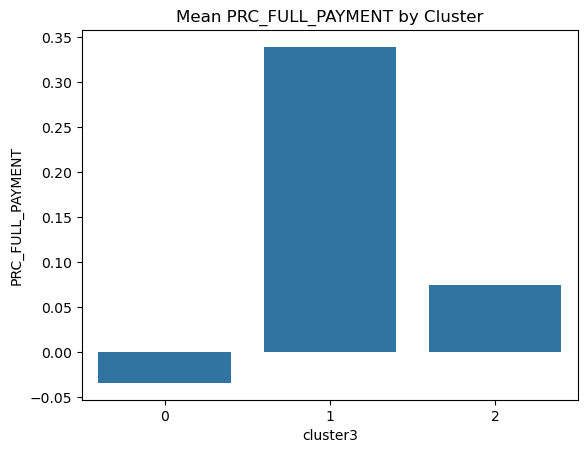

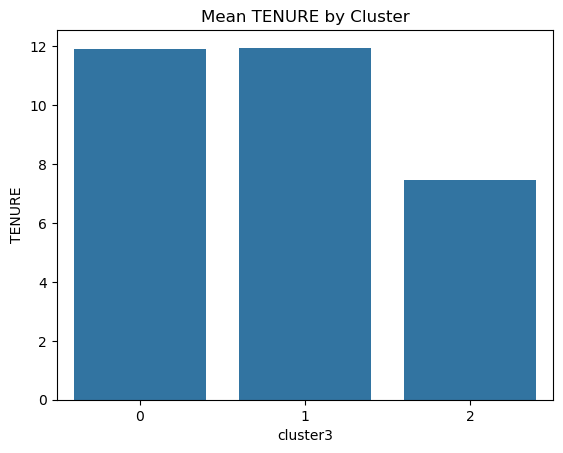

In [274]:
for i in features:
    
    sns.barplot(x = describe_clusters.index
               , y = i
               , data = describe_clusters)
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.show()

In [309]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.6,min_samples=5)
model.fit(df1)

DBSCAN(eps=1.6)

In [301]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*df1.shape[1])
    dbscan.fit(df1)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

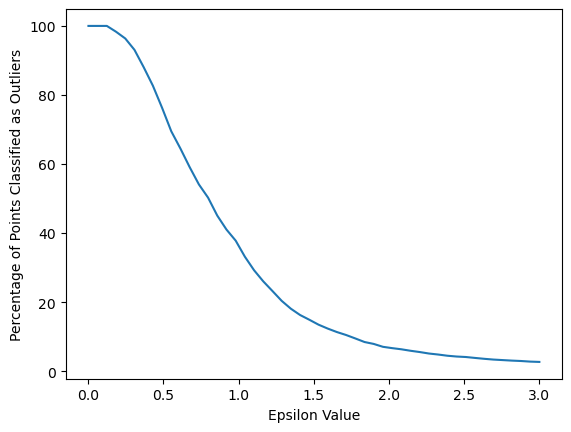

In [302]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*df1.shape[1])
    dbscan.fit(df1)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

In [303]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

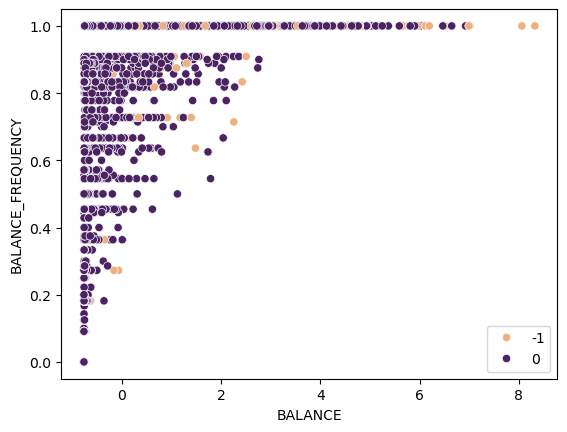

In [312]:
# Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
sns.scatterplot(data=df1,x='BALANCE',y='BALANCE_FREQUENCY',hue=dbscan.labels_,palette='flare')

In [310]:
customer_clustered['dbscan']=model.labels_

In [311]:
customer_clustered['dbscan'].value_counts()

dbscan
 0    7999
-1     629
 1       8
Name: count, dtype: int64

In [313]:
describe_clustersdbscan = customer_clustered.groupby(customer_clustered['dbscan']).mean()
describe_clustersdbscan

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster3
dbscan,,,,,,,,,,,,,,,,,,
-1,1.269043,0.944026,1.692151,1.449031,1.337851,1.235558,0.699067,0.442574,0.535121,0.285383,1.124164,1.522712,1.340850,1.975568,1.033559,0.143363,11.332273,0.815580
0,-0.100179,0.891078,-0.132658,-0.113595,-0.104888,-0.096880,0.480309,0.187484,0.355914,0.126028,-0.088353,-0.119325,-0.104837,-0.154912,-0.088734,-0.010736,11.549819,0.185398
1,0.388352,1.000000,-0.404189,-0.349506,-0.313501,-0.278311,0.218750,0.020833,0.197917,0.093750,-0.045416,-0.413369,-0.600457,-0.436358,7.459775,-0.537727,12.000000,0.000000


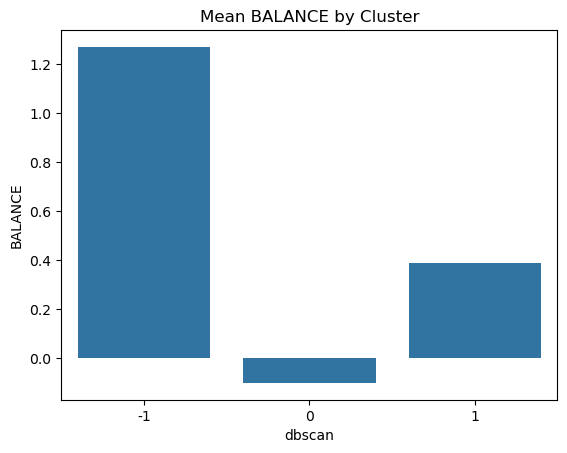

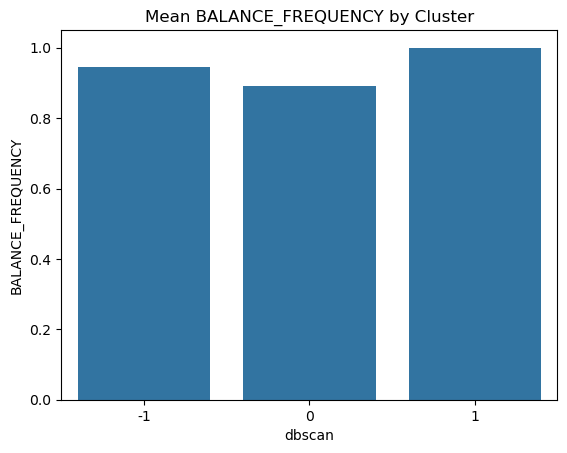

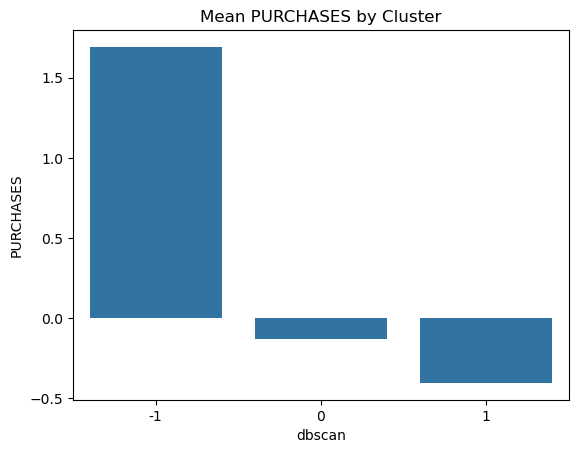

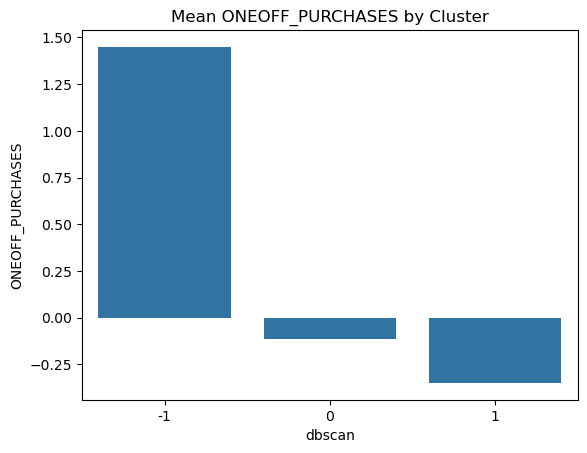

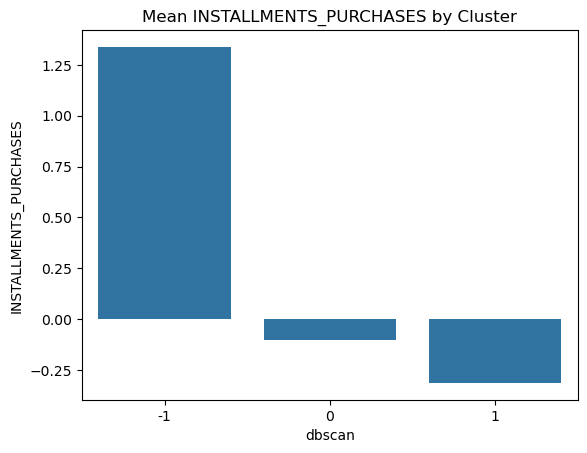

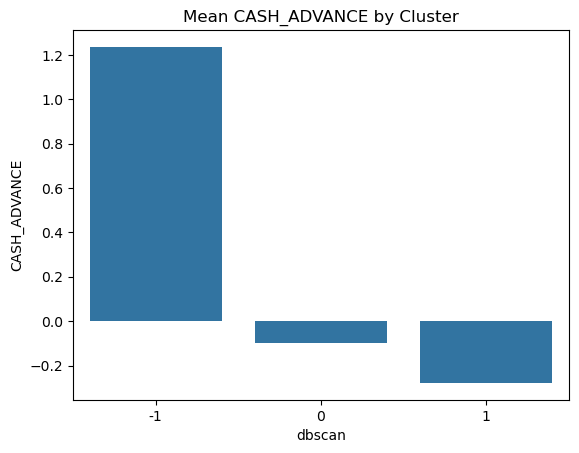

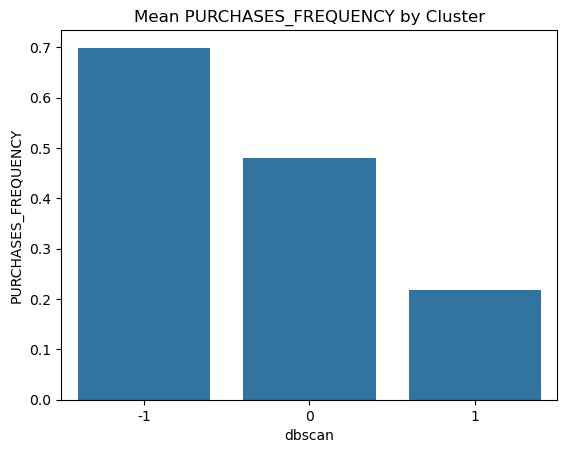

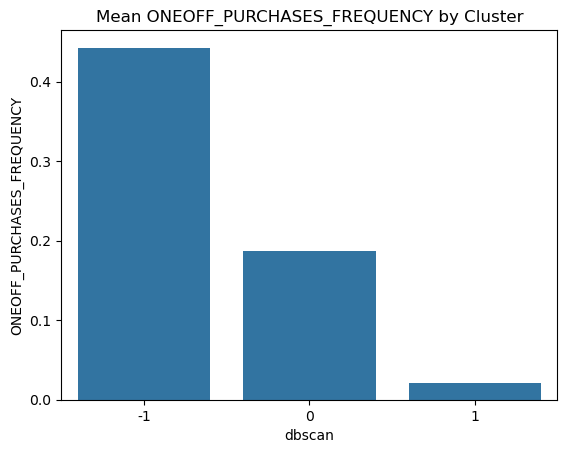

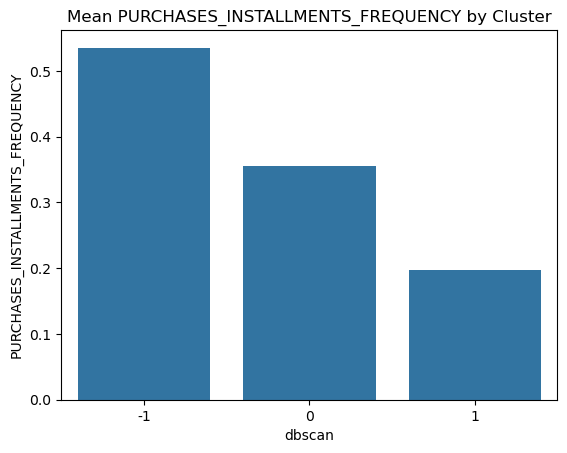

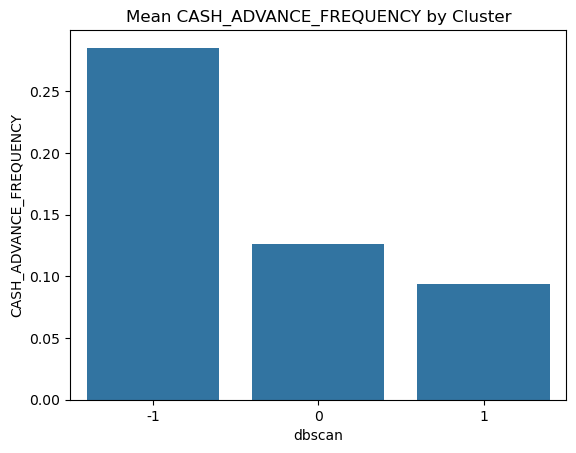

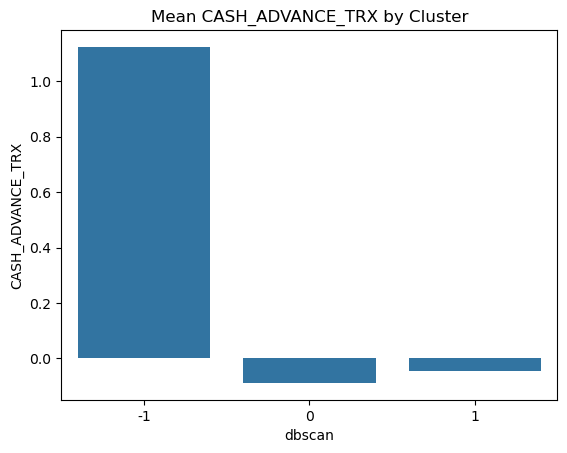

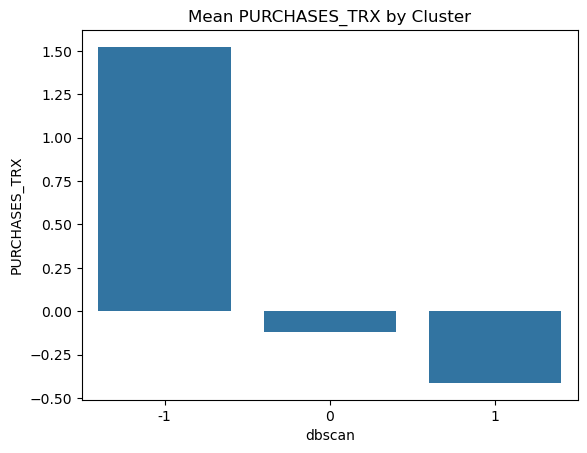

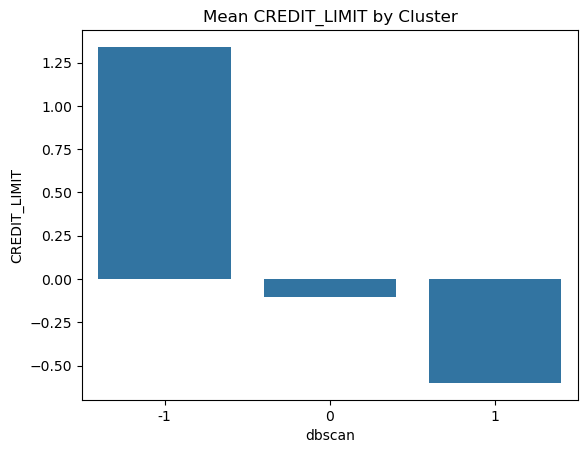

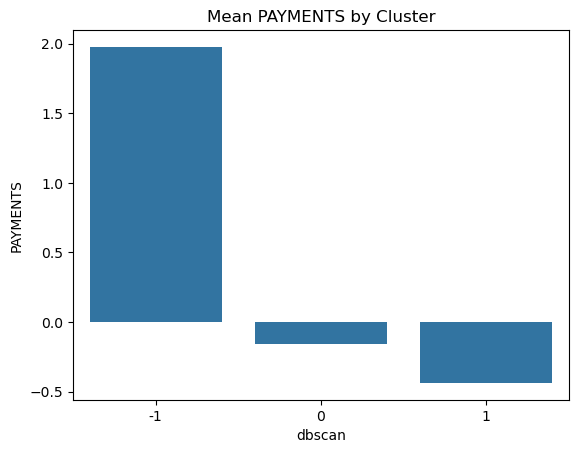

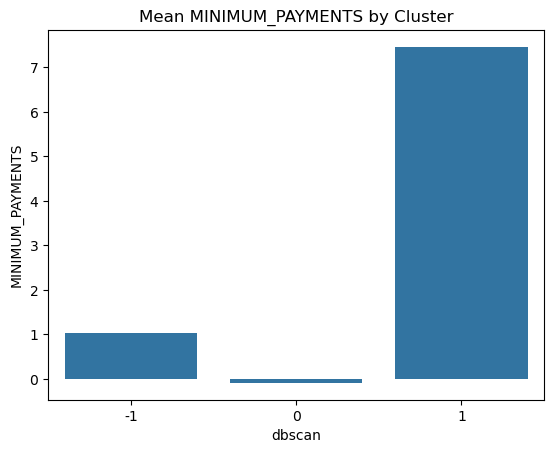

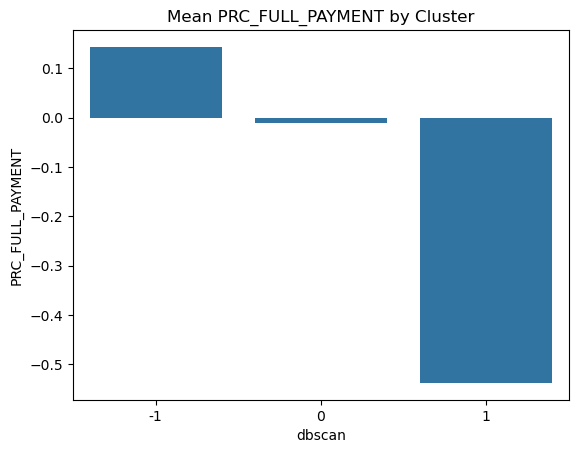

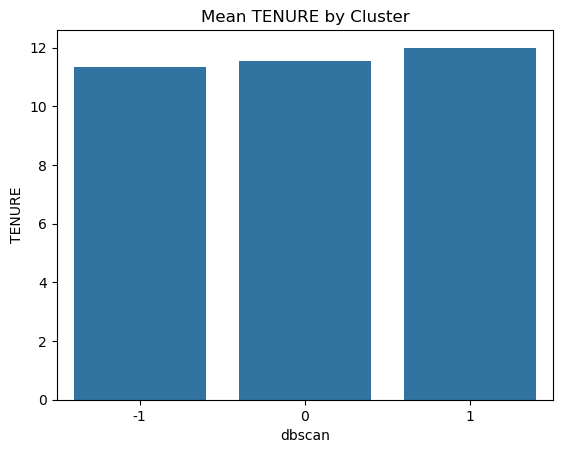

In [314]:
for i in features:
    
    sns.barplot(x = describe_clustersdbscan.index
               , y = i
               , data = describe_clustersdbscan)
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.show()